# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Polikarpus Arya Pradhanika
- **Email:** paryapradhanika@gmail.com
- **ID Dicoding:** Polikarpus Arya Pradhanika

## ❓Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dari penggunaan sepeda dalam beberapa tahun terakir?
- Kapan saja musim / cuaca dimana penjualan mengalami peningkatan?
- Pada waktu kapan saja penggunaan mengalami peningkatan?
- Bagaimana performa penggunaan sepeda pada hari hari biasa?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## **Data Wrangling**

### 🛜 Gathering Data

Dalam tahap mengumpulkan data, kita hanya akan melihat data secara kasar

Proses mendapatkan data ini akan memanfaatkan fungsi `.read_csv()` dari library pandas

In [5]:
# Mendapatkan data day.csv
day_df = pd.read_csv('./day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('./hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengubah Data
Pada dokumentasi sumber yang dapat dibaca pada [sumber](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset). Di dapat makna dari beberapa data berikut
- season:
    * 1: semi
    * 2: panas
    * 3: gugur
    * 4: dingin
- year:
    * 0: 2011
    * 1: 2012
- weathersit:
    * 1: (cerah) Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: (berawan) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: (gerimis) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: (deras) Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- weekdays:
    * 0: Minggu
    * 1: Senin
    * 2: Selasa
    * 3: Rabu
    * 4: Kamis
    * 5: Jumat
    * 6: Sabtu

Oleh karena itu, dataset perlu disesuaikan

In [7]:
# persiapkan fungsi
season_val = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
year_val = {0: 2011, 1: 2012}
wheatersit_val = {1: 'Cerah', 2: 'Berawan', 3: 'Kabut', 4: 'Hujan'}
day_val = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

In [8]:
# Ubah data
day_df['season'] = day_df['season'].replace(season_val)
day_df['yr'] = day_df['yr'].replace(year_val)
day_df['weathersit'] = day_df['weathersit'].replace(wheatersit_val)
day_df['weekday'] = day_df['weekday'].replace(day_val)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Semi,2011,1,0,Sabtu,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,1,0,Minggu,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,1,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,1,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,1,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
# Ubah data
hour_df['season'] = day_df['season'].astype(str).replace(season_val)
hour_df['yr'] = day_df['yr'].replace(year_val)
hour_df['weathersit'] = day_df['weathersit'].replace(wheatersit_val)
hour_df['weekday'] = day_df['weekday'].replace(day_val)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Semi,2011.0,1,0,0,Sabtu,0,Berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011.0,1,1,0,Minggu,0,Berawan,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011.0,1,2,0,Senin,0,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011.0,1,3,0,Selasa,0,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011.0,1,4,0,Rabu,0,Cerah,0.24,0.2879,0.75,0.0,0,1,1


### 💯 Assessing Data (Menilai data)

Dalam menilai data, akan ada beberapa hal yang dilakukan
* Melakukan deskriptive statistic terhadap data (menggunakan `.describe()`)
* Memeriksa apakah ada data yang hilang (NaN / null)
* Memeriksa apakah ada duplikasi pada data

### Menilai day.csv

In [10]:
# Mendapatkan data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.5+ KB


In [11]:
print("Banyak data kosong\n", day_df.isna().sum(), sep="")

Banyak data kosong
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### 🌟 **Insight**
- Terlihat bahwa data day.csv lengkap tanpa ada data yang kosong
- Namun untuk kolom dteday, masih dalam tipe data object yang perlu kite benahi

In [12]:
# melakukan descriptive statistics
day_df.describe()

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,4.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,7.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,10.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,12.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
# Mencari banyak duplicate
print("Banyak duplikasi", day_df.duplicated().sum())

Banyak duplikasi 0


#### 🌟 **Insight**
- Tidak terdapat anomali pada _descriptive statistic_  data ini
- Tidak ada duplikasi pada data ini

In [14]:
# Mendapatkan insight dari hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      731 non-null    object 
 3   yr          731 non-null    float64
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     731 non-null    object 
 8   workingday  17379 non-null  int64  
 9   weathersit  731 non-null    object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(5), int64(8), object(4)
memory usage: 2.3+ MB


In [15]:
# Mencari banyak null
print("Banyak null\n", day_df.isnull().sum(), sep="")

Banyak null
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### 🌟 **Insight**
- Terlihat bahwa data hour.csv lengkap tanpa ada data yang kosong
- Namun untuk kolom dteday, masih dalam tipe data object yang perlu kite benahi

In [16]:
hour_df.describe()

,instant,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.500684,6.537775,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500342,3.438776,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,4.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,7.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,10.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
# Mencari banyak duplicate
print("Banyak duplikasi", hour_df.duplicated().sum())

Banyak duplikasi 0


#### 🌟 **Insight**
- Tidak terdapat anomali pada _descriptive statistic_ data ini
- Tidak ada duplikasi pada data ini

### ☀️ **Hasil Penilaian Data**

Kedua dataset memiliki hasil penilaian yang sama yakni
* Seluruh data lengkap
* Data pada kolom dteday masih dalam format object
* Tidak terdapat anomali pada _descriptive statistic_ 
* Tidak ada duplikasi

### 🧹 Cleaning Data

Terdapat beberapa hal yang dapat dilkukan
* Mengubah format kolom `dteday` dari `object` menjadi `datetime`

In [18]:
# Mengubah untuk day.csv
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
# Mengubah untuk hour.csv
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    float64       
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     731 non-null    object        
 8   workingday  17379 non-null  int64         
 9   weathersit  731 non-null    object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explorasi pengguna sepeda berdasarkan cuaca

In [20]:
# Eksplor berdasarkan season
day_df.groupby(['season']).cnt.sum().sort_values(ascending=False)

season
Gugur     1061129
Panas      918589
Dingin     841613
Semi       471348
Name: cnt, dtype: int64

In [21]:
# Eksplor berdasarkan season
day_df.groupby(['season']).cnt.mean().sort_values(ascending=False)

season
Gugur     5644.303191
Panas     4992.331522
Dingin    4728.162921
Semi      2604.132597
Name: cnt, dtype: float64

In [22]:
# Eksplor berdasarkan cuaca
day_df.groupby(['weathersit']).cnt.sum().sort_values(ascending=False)

weathersit
Cerah      2257952
Berawan     996858
Kabut        37869
Name: cnt, dtype: int64

In [23]:
# Eksplor berdasarkan cuaca
day_df.groupby(['weathersit']).cnt.mean().sort_values(ascending=False)

weathersit
Cerah      4876.786177
Berawan    4035.862348
Kabut      1803.285714
Name: cnt, dtype: float64

In [24]:
# Eksplor berdasarkan seasone dan situasi cuaca
day_df.groupby(['season', 'weathersit']).cnt.mean().sort_values(ascending=False)

season  weathersit
Gugur   Cerah         5878.257353
Panas   Cerah         5548.548673
Gugur   Berawan       5222.479167
Dingin  Cerah         5043.563107
        Berawan       4654.000000
Panas   Berawan       4236.705882
Semi    Cerah         2811.135135
Gugur   Kabut         2751.750000
Semi    Berawan       2357.166667
Dingin  Kabut         1961.600000
Panas   Kabut         1169.000000
Semi    Kabut          934.750000
Name: cnt, dtype: float64

🌟 **Insight:**
- Berdasarkan analisis, didapatkan bahwa urutan cuaca dengan penjualan terbanyak adalah **Cerah**, **Berawan**, dan **Berkabut**
- Berdasarkan analisis, didapatkan bahwa urutan mucim dengan penjualan terbanyak adalah **Gugus**, **Panas**, **Dingin**, dan **Semi**

In [25]:
# Eksplorasi data berdasarkan jam
hour_df.groupby(['hr']).cnt.mean().sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

🌟 **Insight:**
- Berdasarkan analisis, didapatkan bahwa sekitar pukul 14 hingga 19.00 penggunaan sepeda cenderung banyak

In [26]:
# Eksplorasi data berdasarkan hari
day_df.groupby(['weekday']).cnt.mean().sort_values(ascending=False)

weekday
Jumat     4690.288462
Kamis     4667.259615
Sabtu     4550.542857
Rabu      4548.538462
Selasa    4510.663462
Senin     4338.123810
Minggu    4228.828571
Name: cnt, dtype: float64

🌟 **Insight:**
- Berdasarkan analisis, rata - rata penggunaan paling banyak di hari **Jumat** dan paling sedikit di hari **Minggu**

## 📍 Visualization & Explanatory Analysis

### Pertanyaan 1 & 2:

In [27]:
# Kelompokkan data per bulan
month_df = day_df.groupby(day_df['dteday'].dt.strftime('%Y-%B'))['cnt'].mean().reset_index()
month_df.rename(columns={"dteday": "dtemonth"}, inplace=True)
month_df['dtemonth'] = pd.to_datetime(month_df['dtemonth'], format='%Y-%B')
month_df.sort_values(by='dtemonth', ascending=True, inplace=True)
month_df = month_df.assign(year_month=month_df['dtemonth'].dt.strftime('%B %Y'))
month_df.head(24)

,dtemonth,cnt,year_month
4,2011-01-01,1231.903226,January 2011
3,2011-02-01,1721.964286,February 2011
7,2011-03-01,2065.967742,March 2011
0,2011-04-01,3162.333333,April 2011
8,2011-05-01,4381.322581,May 2011
6,2011-06-01,4783.733333,June 2011
5,2011-07-01,4559.387097,July 2011
1,2011-08-01,4409.387097,August 2011
11,2011-09-01,4247.266667,September 2011
10,2011-10-01,3984.225806,October 2011


Selanjutnya, kita akan membuat grafik analisis dari waktu ke waktu terkait rata - rata penggunaan sepeda per bulannya

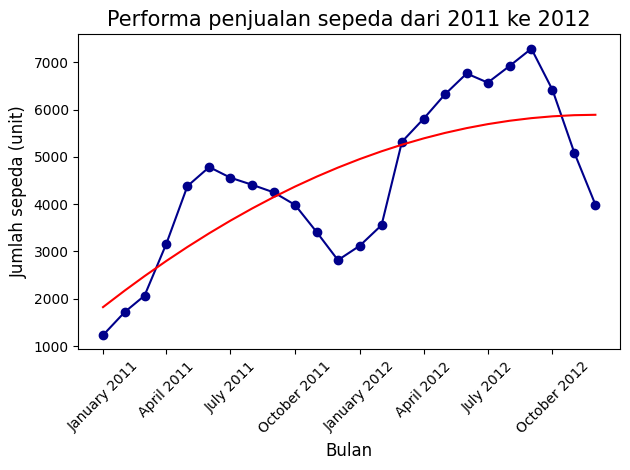

In [28]:
# Menunjukkan performa penjualan sepeda
plt.plot(month_df['dtemonth'], month_df['cnt'], marker='o', color='darkblue')

# Menambahkan trendline menggunakan polynomial
z = np.polyfit(month_df['dtemonth'].map(dt.datetime.toordinal), month_df['cnt'], 2)
p = np.poly1d(z)
plt.plot(month_df['dtemonth'], p(month_df['dtemonth'].map(dt.datetime.toordinal)), "r")

plt.title("Performa penjualan sepeda dari 2011 ke 2012",
          loc="center", fontsize=15)
plt.xticks(ticks=month_df['dtemonth'][::3], labels=month_df['dtemonth']
           [::3].dt.strftime('%B %Y'), fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah sepeda (unit)", fontsize=12)

plt.tight_layout()
plt.show()

Selanjutnya, akan dibuat menggunakan bar plot untuk menunjukkan peningkatan penjualan sepeda setiap bulannya di 2011 menuju 2012 

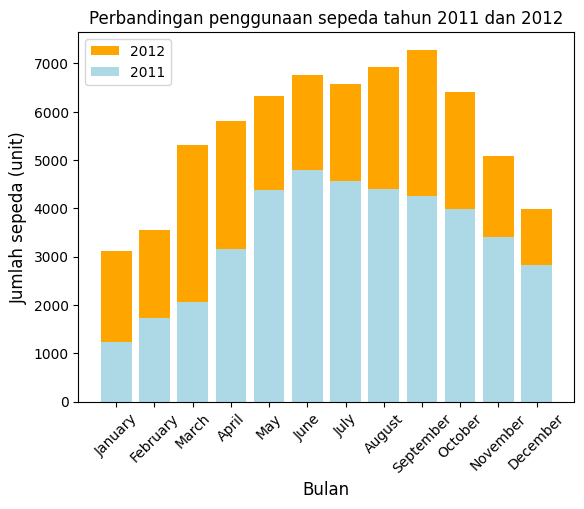

In [29]:
y2011_df = month_df[month_df['dtemonth'].dt.strftime("%Y") == '2011']
y2012_df = month_df[month_df['dtemonth'].dt.strftime("%Y") == '2012']
plt.bar(y2012_df['dtemonth'].dt.strftime("%B"),
        y2012_df['cnt'], color='orange', label='2012')
plt.bar(y2011_df['dtemonth'].dt.strftime("%B"), y2011_df['cnt'], color='lightblue', label='2011')
plt.title("Perbandingan penggunaan sepeda tahun 2011 dan 2012",
          loc="center", fontsize=12)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah sepeda (unit)", fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

### 🌟 **Insight**

* Grafik ini menunjukkan bahwa terjadi **peningkatan** penjualan sepeda dari tahun 2011 menuju 2012. 
* penggunaan sepeda cenderung mengalami peningkatan di bulan Juni hingga Oktober dan cenderung turun di bulan Desember hingga Februari

### 📝 Mengelompokkan data berdasarkan musim

Selanjutnya, akan dilakukan analisis data berdasarkan musimnya

In [30]:
season_order={'Semi': 0, 'Panas': 1, 'Gugur': 2, 'Dingin': 3}

season_df = day_df.groupby(['season', 'yr']).agg({
    'cnt': 'mean'
}).reset_index()

season_df['season_order'] = season_df['season'].map(season_order)
season_df.sort_values(
    by=['yr', 'season_order'],
    ascending=True,
    inplace=True
)
season_df.drop(columns='season_order', inplace=True)
season_df

,season,yr,cnt
6,Semi,2011,1666.666667
4,Panas,2011,3775.173913
2,Gugur,2011,4464.361702
0,Dingin,2011,3664.460674
7,Semi,2012,3531.296703
5,Panas,2012,6209.489130
3,Gugur,2012,6824.244681
1,Dingin,2012,5791.865169


#### Menampilkan data

Selanjutnya, data akan ditampilkan

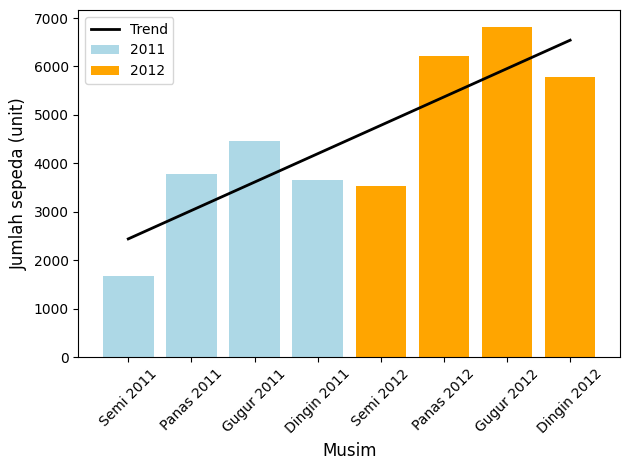

In [31]:
y2011_season_df = season_df[season_df['yr'] == 2011]
y2012_season_df = season_df[season_df['yr'] == 2012]
plt.bar((y2011_season_df['season'] + " " + y2011_season_df["yr"].astype(str)),
        y2011_season_df['cnt'], color='lightblue', label='2011')
plt.bar((y2012_season_df['season'] + " " + y2012_season_df["yr"].astype(str)),
        y2012_season_df['cnt'], color='orange', label='2012')

# Menambahkan trendline
# Menambahkan trendline menggunakan linear
z = np.polyfit(np.arange(len(season_df)), season_df['cnt'], 1)
p = np.poly1d(z)
plt.plot((season_df['season'] + " " + season_df["yr"].astype(str)), p(np.arange(len(season_df))), "black", label='Trend', linewidth=2)

plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah sepeda (unit)", fontsize=12)

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🌟 **Insight**

* Terlihat bahwa dalam setiap tahun, penjualan paling **tinggi** terjadi pada **musim gugur** dan **terendah** pada **musim semi**
* Pada tahun 2012, penjualan mengalami **kenaikan** dibandingkan tahun 2011

### 📝 Mengelompokkan data berdasarkan cuaca

Selanjutnya, akan dilakukan analisis data berdasarkan cuacanya

In [32]:
# Dapatkan rata - rata penggunaan sepeda tiap hari cuaca
weather_df = day_df.groupby(['weathersit', 'yr']).agg({
    'cnt': 'mean'
}).reset_index()

# urutkan nilainya
weather_df.sort_values(
    by=['yr', 'weathersit'],
    ascending=True,
    inplace=True
)

# reset index
weather_df.reset_index(drop=True, inplace=True)

# tampilkan data
weather_df

,weathersit,yr,cnt
0,Berawan,2011,3088.096774
1,Cerah,2011,3694.986726
2,Kabut,2011,1674.133333
3,Berawan,2012,4991.333333
4,Cerah,2012,6003.734177
5,Kabut,2012,2126.166667


#### Menampilkan data

Selanjutnya, data akan ditampilkan

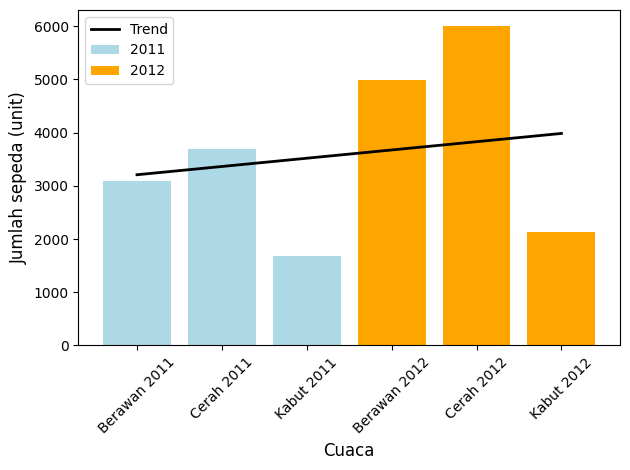

In [33]:
y2011_weather_df = weather_df[weather_df['yr'] == 2011]
y2012_weather_df = weather_df[weather_df['yr'] == 2012]
plt.bar((y2011_weather_df['weathersit'] + " " + y2011_weather_df["yr"].astype(str)),
        y2011_weather_df['cnt'], color='lightblue', label='2011')
plt.bar((y2012_weather_df['weathersit'] + " " + y2012_weather_df["yr"].astype(str)),
        y2012_weather_df['cnt'], color='orange', label='2012')

# Menambahkan trendline
# Menambahkan trendline menggunakan linear
z = np.polyfit(np.arange(len(weather_df)), weather_df['cnt'], 1)
p = np.poly1d(z)
plt.plot((weather_df['weathersit'] + " " + weather_df["yr"].astype(str)),
         p(np.arange(len(weather_df))), "black", label='Trend', linewidth=2)

plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah sepeda (unit)", fontsize=12)

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🌟 **Insight**

* Terlihat bahwa dalam setiap tahun, penjualan paling **tinggi** terjadi pada **cuaca cerah** dan **terendah** pada **cuaca berawan**
* Pada tahun 2012, penjualan mengalami **kenaikan** dibandingkan tahun 2011

### Pertanyaan 3

### 📝 Mengelompokkan data berdasarkan jam

Selanjutnya, kita akan menampilkan hasil pengelompokan data berdasarkan jam

In [34]:
hour_cat_df = hour_df.groupby(['hr']).agg({
    'cnt': 'mean'
}).reset_index()
hour_cat_df

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


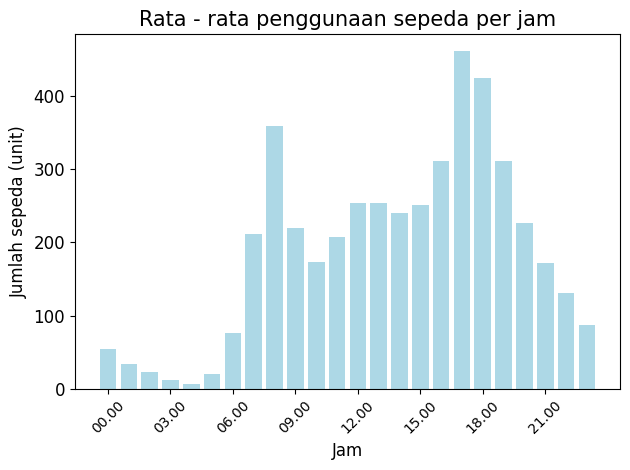

In [43]:
tmp_hour_cat_df = hour_cat_df.copy()
tmp_hour_cat_df['hr_str'] = tmp_hour_cat_df['hr'].astype(str).str.zfill(2) + '.00'
plt.bar(tmp_hour_cat_df['hr'], tmp_hour_cat_df['cnt'], color='lightblue')
plt.xticks(ticks=tmp_hour_cat_df['hr'][::3], labels=tmp_hour_cat_df['hr_str'][::3], fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah sepeda (unit)", fontsize=12)
plt.title("Rata - rata penggunaan sepeda per jam", fontsize=15)
plt.tight_layout()
plt.show()

### 🌟 **Insight**

* Terlihat bahwa rata - rata penggunaan sepeda paling tinggi ada di pukul 17.00 dan paling rendah di pukul 04.00
* Pada pagi hari (00.00 hingga 04.00) penggunaan sepeda cenderung **rendah**
* Sementara pada sore hari (16.00 - 19.00) penggunaan sepeda cenderung **tinggi**

### Pertanyaan 4

### 📝 Mengelompokkan data berdasarkan hari

Selanjutnya, kita akan menampilkan hasil pengelompokan data berdasarkan hari

In [36]:
# Dapatkan tabel sederhana berisi rata - rata penggunaan sepeda
day_cat_df = day_df.groupby("weekday").agg({
    'cnt': 'mean'
}).reset_index()

# Urutkan data berdasarkan hari
day_back = {"Minggu": 0, "Senin": 1, "Selasa": 2, "Rabu": 3, "Kamis": 4, "Jumat": 5, "Sabtu": 6}
day_cat_df = day_cat_df.assign(weekday_order=day_cat_df['weekday'].map(day_back))
day_cat_df.sort_values(by='weekday_order', inplace=True)

# Drop kolom pembantu
# day_cat_df.drop(columns='weekday_order', inplace=True)
day_cat_df

,weekday,cnt,weekday_order
2,Minggu,4228.828571,0
6,Senin,4338.123810,1
5,Selasa,4510.663462,2
3,Rabu,4548.538462,3
1,Kamis,4667.259615,4
0,Jumat,4690.288462,5
4,Sabtu,4550.542857,6


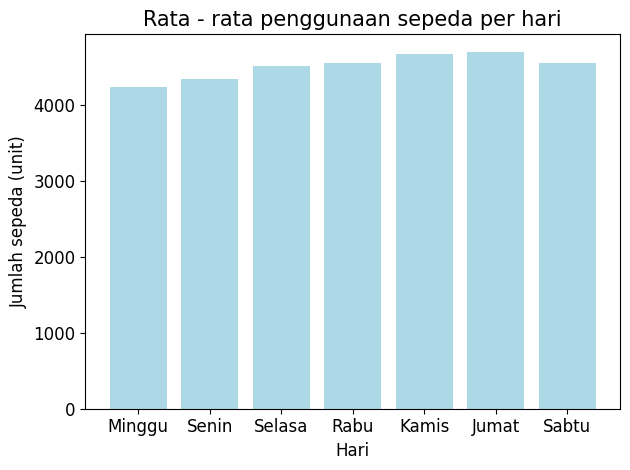

In [37]:
plt.bar(day_cat_df['weekday'], day_cat_df['cnt'], color='lightblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Jumlah sepeda (unit)", fontsize=12)
plt.title("Rata - rata penggunaan sepeda per hari", fontsize=15)
plt.tight_layout()
plt.show()

### 🌟 **Insight**

* Terlihat tidak ada perbedaan signifikan di antara setiap hari
* Namun, hari dengan rata - rata penggunaan tertinggi ada pada hari Jumat dan terendah pada hari Minggu.

## 🖊️Conclusion

- Penggunaan sepeda pada tahun 2012 cenderung mengalami peningkatan dibandingkan tahun 2011
- Pada musim gugur, penggunaan sepeda mengalami pelonjakan. Sementara pada musim semi, penggunaan sepeda mengalami penurunan
- Pada cuaca cerah, penggunaan sepeda cenderung tinggi. Sementara pada cuaca berkabut, penggunaan sepeda cenderung rendah
- Jam dengan rata - rata penggunaan sepeda tertinggi adalah pukul 17.00 dan terendah pada pukul 04.00
- Hari dengan rata - rata penggunaan sepeda tertinggi adalah hari Jumat dan terendah adalah hari Minggu